## Importing Libraries

In [1]:
import numpy as np
from ipynb.fs.full.MNIST import *
import matplotlib.pyplot as plt
from skimage.transform import resize

## Showing Dataset Images

In [9]:
def show_img(img):
    img = img.reshape(28, 28)
    plt.imshow(img, cmap = 'gray')
    plt.show()

(x_train, y_train), (x_test, y_test) = load_mnist(flatten = True, normalize = True)

5


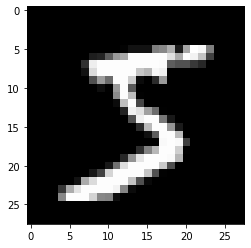

In [10]:
img = x_train[0]
label = y_train[0]
print(label)
show_img(img)

## PCA Construction & Eigenspace

In [11]:
def PCA(k, X):
    data = X
    data_mean = np.mean(data, axis = 0)
    data_mean = data_mean.reshape(-1, data_mean.shape[0])
    data = data - data_mean
    cov = np.cov(data.T)
    eigenvalue, eigenvector = np.linalg.eig(cov)
    eigenvector = eigenvector.T
    ind = np.argsort(eigenvalue)[::-1]
    eigenvalue = eigenvalue[ind]
    eigenvector = eigenvector[ind]
    component = eigenvector[0:k]
    eigenspace = np.dot(data, component.T).T
    
    return eigenspace 

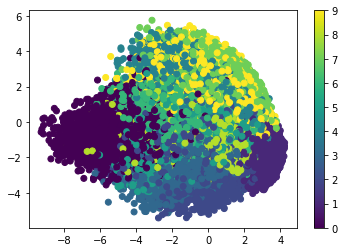

In [18]:
k = 196
eigenspace = PCA(k, x_train)
x1 = eigenspace.T[:, 0]
x2 = eigenspace.T[:, 1]
plt.scatter(x1, x2, c = y_train)
plt.colorbar()
plt.show()

## Finding Weights for ith Samples on Training Set

In [19]:
x_reshaped = np.zeros((x_train.shape[0], k))
for i in range(x_train.shape[0]):
    img_train = x_train[i].reshape(28,28)
    img_train = resize(img_train, (14, 14)) 
    x_reshaped[i] = img_train.reshape(k, )

In [20]:
weight_samples = {}
length = {}
projections = {}
for j in range(10):
    weight_samples['Class ' + str(j)] = 0
    length['Class ' + str(j)] = 0
    projections['Class ' + str(j)] = 0
    
for i in range(x_train.shape[0]):
    for j in range(10):
        if y_train[i] == j:
            length['Class ' + str(j)] += 1
            weight_samples['Class ' + str(j)] += x_reshaped[i].reshape(k, 1)

In [21]:
for j in range(10):
    weight_samples['Class ' + str(j)] /= length['Class ' + str(j)] 
    projections['Class ' + str(j)] = np.dot(eigenspace.T, weight_samples['Class ' + str(j)])

## Finding Weights for ith Samples on Test Set

In [22]:
x_reshaped_test = np.zeros((x_test.shape[0], k))
for i in range(x_test.shape[0]):
    img_test = x_test[i].reshape(28,28)
    img_test = resize(img_test, (14, 14)) 
    x_reshaped_test[i] = img_test.reshape(k, )

In [24]:
diff = np.zeros((x_reshaped_test.shape[0], 10))
for i in range(x_reshaped_test.shape[0]):
    for j in range(10):
        test_projection = np.dot(eigenspace.T, x_reshaped_test[i].reshape(k, 1))
        diff[i, j] = np.linalg.norm(projections['Class ' + str(j)] - test_projection)

## Testing Accuracy

In [25]:
y_pred = np.argmin(diff, axis = 1)
print(sum(y_pred == y_test) / x_reshaped_test.shape[0] * 100)

76.13
